<style>
    .title_container {
        margin: auto;
        background: rgb(81,92,103);
        background: linear-gradient(90deg, rgba(81,92,103,1) 36%, rgba(12,35,66,1) 62%);
        border-radius: 7px;
        color: white;
        text-align:center;
        width:75%;
        padding-top:2%;
        padding-bottom:2%;
    }
    
    .question_container {
        margin: auto;
        background: rgb(84,138,142);
        background: linear-gradient(90deg, rgba(84,138,142,1) 41%, rgba(145,201,73,1) 81%);
        border-radius: 7px;
        color: white;
        text-align:left;
        width:75%;
        padding-top:1%;
        padding-bottom:1%;
        padding-left: 2%;
        margin-top:2%;
    }
    
    .question_container p {
        font-size: 16px;
    }
    
    .alert_container {
        margin: auto;
        background: rgb(142,94,84);
        background: linear-gradient(128deg, rgba(142,94,84,1) 13%, rgba(201,103,73,1) 69%);
        border-radius: 7px;
        color: white;
        text-align:left;
        width:75%;
        padding-top:1%;
        padding-bottom:1%;
        padding-left: 2%;
        margin-top:2%;
    }
    
    .alert_container p {
        font-size: 16px;
    }
    
    .code_span {
        background-color: #E2E7EC;
        padding:2px;
        border-radius:1px;
        font-family: Consolas,monaco,monospace;
        color:black;
    }
</style>

<div class ='title_container'>
    <h1> Análisis de Datos II </h1>
    <h2> Profesor: Oldemar Rodríguez </h2>
    <h3> Estudiante: Jimmy Calvo Monge </h3>
    <h3> Carné: B31281 </h3>
    <hr style='color:white; width:80%;'>
    <h4> TAREA 10 </h4>
    <h4> Fecha de entrega: 6 de Noviembre de 2022 </h4>
</div>

Importamos los módulos necesarios para resolver esta tarea.

In [48]:
### Basicos
import numpy as np
import pandas as pd
from pandas import DataFrame

### Utilidades/Varios
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.patches import Circle
from sklearn.tree import export_graphviz
from sklearn import tree
import seaborn as sns
import time
import graphviz
import os

### Training/Testing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### predictPy
from predictPy import Analisis_Predictivo

### Validacion Cruzada
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

### Modelos:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Arboles de Decision
from sklearn.tree import DecisionTreeClassifier
# Bosques Aleatorios
from sklearn.ensemble import RandomForestClassifier
# Ada Boost
from sklearn.ensemble import AdaBoostClassifier
# XG Boost
from sklearn.ensemble import GradientBoostingClassifier
# SVM
from sklearn.svm import SVC
# Bayes
from sklearn.naive_bayes import GaussianNB
# Discriminante
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### Clase MatConf de la Tarea 2

class MatConf:
    
    def __init__(self,matriz):
        
        self.mat_conf = matriz
        
        VN = self.mat_conf[0,0]
        VP = self.mat_conf[1,1]
        FP = self.mat_conf[0,1]
        FN = self.mat_conf[1,0]
        
        dict_medidas = {
            'Precisión Global' : (VN+VP)/(VN+FP+FN+VP),
            'Error Global' : (FN+FP)/(VN+FP+FN+VP),
            'Precisión Positiva (PP)' : VP/(FN+VP),
            'Precisión Negativa (PN)' : VN/(VN+FP),
            'Proporción de Falsos Positivos (PFP)' : FP/(VN+FP),
            'Proporción de Falsos Negativos (PFN)' : FN/(FN+VP),
            'Asertividad Positiva (AP)' : VP/(FP+VP),
            'Asertividad Negativa (AN)' : VN/(VN+FN)
        }
        self.dict_medidas = dict_medidas
        
    def __str__(self):
        mensaje="Estos son los resultados para esta matriz de confusion:"
        for key in list(self.dict_medidas.keys()):
            mensaje = mensaje + f"\n - {key}: {self.dict_medidas[key]}"
        return mensaje

import warnings
warnings.filterwarnings('ignore')

<div class='question_container'>
    <h2> Pregunta 1 </h2>
    <p> La tabla de datos <code>novatosNBA.csv</code> contiene diferentes métricas de desempeño de novatos de la NBA en su primera temporada. Para esta tabla, las 21 primeras columnas corresponden a las variables predictoras y la variable <code>Permanencia</code> es la variable a predecir, la cual indica si el jugador permanece en la NBA luego de 5 años. La tabla contiene 1340 filas (individuos) y 21 columnas (variables), con la tabla realice lo siguiente: </p>
    <ul>
        <li> El objetivo de este ejercicio es analizar la variación del error (usando el enfoque trainingtesting) para la predicción de la variable <code>Permanencia</code>. Para esto repita 5 veces el cálculo de error global de predicción usando el método de los k vecinos más cercanos (usen neighbors=50) y con un 75% de los datos para tabla aprendizaje y un 25% para la tabla testing. Grafique los resultados. </li>
    <li> El objetivo de este ejercicio es medir el error para la predicción de la variable Permanencia, utilizando validación cruzada con K grupos (<code>K-fold cross-validation</code>). Para esto usando el método de los k vecinos más cercanos (use <code>n_neighbors=50</code>) realice una validación cruzada 5 veces con 10 grupos (folds) y grafique el error obtenido en cada iteración, agregue en este gráfico los 5 errores generados en el ejercicio anterior.</li>
    <li> ¿Qué se puede concluir? </li>
    </ul>
</div>

In [3]:
datos_novatos=pd.read_csv("novatosNBA.csv",sep=";",index_col=0)
datos_novatos.head(5)

PartidosJugados  MinutosJugados  PuntosPorJuego  \
Nombre                                                             
Brandon Ingram                36            27.4             7.4   
Andrew Harrison               35            26.9             7.2   
JaKarr Sampson                74            15.3             5.2   
Malik Sealy                   58            11.6             5.7   
Matt Geiger                   48            11.5             4.5   

                 PuntosCampoAnotados  PuntosCampoIntentados  \
Nombre                                                        
Brandon Ingram                   2.6                    7.6   
Andrew Harrison                  2.0                    6.7   
JaKarr Sampson                   2.0                    4.7   
Malik Sealy                      2.3                    5.5   
Matt Geiger                      1.6                    3.0   

                 PuntosCampoPorcentaje  Puntos3Anotados  Puntos3Intentados  \
Nombre                                                                       
Brandon Ingram                    34.7              0.5                2.1   
Andrew Harrison                   29.6              0.7                2.8   
JaKarr Sampson                    42.2              0.4                1.7   
Malik Sealy                       42.6              0.1                0.5   
Matt Geiger                       52.4              0.0                0.1   

                 Puntos3Porcentaje  TirosLibresRealizados  \
Nombre                                                      
Brandon Ingram                25.0                    1.6   
Andrew Harrison               23.5                    2.6   
JaKarr Sampson                24.4                    0.9   
Malik Sealy                   22.6                    0.9   
Matt Geiger                    0.0                    1.3   

                 TirosLibresIntentados  TirosLibresPorcentaje  \
Nombre                                                          
Brandon Ingram                     2.3                   69.9   
Andrew Harrison                    3.4                   76.5   
JaKarr Sampson                     1.3                   67.0   
Malik Sealy                        1.3                   68.9   
Matt Geiger                        1.9                   67.4   

                 RebotesOfensivos  RebotesDefensivos  Rebotes  Asistencias  \
Nombre                                                                       
Brandon Ingram                0.7                3.4      4.1          1.9   
Andrew Harrison               0.5                2.0      2.4          3.7   
JaKarr Sampson                0.5                1.7      2.2          1.0   
Malik Sealy                   1.0                0.9      1.9          0.8   
Matt Geiger                   1.0                1.5      2.5          0.3   

                 Robos  Bloqueos  PerdidaBalon  Permanencia  
Nombre                                                       
Brandon Ingram     0.4       0.4           1.3            0  
Andrew Harrison    1.1       0.5           1.6            0  
JaKarr Sampson     0.5       0.3           1.0            0  
Malik Sealy        0.6       0.1           1.0            1  
Matt Geiger        0.3       0.4           0.8            1

In [4]:
### Hay datos faltantes:
nas_dict={}
for col in datos_novatos.columns:
    nas_dict[col]=datos_novatos[col].isna().sum()
nas_dict

{'PartidosJugados': 0,
 'MinutosJugados': 0,
 'PuntosPorJuego': 0,
 'PuntosCampoAnotados': 0,
 'PuntosCampoIntentados': 0,
 'PuntosCampoPorcentaje': 0,
 'Puntos3Anotados': 0,
 'Puntos3Intentados': 0,
 'Puntos3Porcentaje': 11,
 'TirosLibresRealizados': 0,
 'TirosLibresIntentados': 0,
 'TirosLibresPorcentaje': 0,
 'RebotesOfensivos': 0,
 'RebotesDefensivos': 0,
 'Rebotes': 0,
 'Asistencias': 0,
 'Robos': 0,
 'Bloqueos': 0,
 'PerdidaBalon': 0,
 'Permanencia': 0}

In [5]:
datos_novatos=datos_novatos.dropna() ### Eliminamos los fatos faltantes por ahora.

In [7]:
X = datos_novatos.drop(['Permanencia'],axis=1)
y = datos_novatos['Permanencia']

Medimos la variación del error a través de varias iteraciones en las que se parte la tabla en training - testing. Graficamos los resultados.

In [11]:
mc_tt = []

for i in range(5):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
    
    knn = KNeighborsClassifier(n_neighbors = 50)
    noimprimir = knn.fit(X_train, y_train.values.ravel())
    MC = confusion_matrix(y_test, knn.predict(X_test))
        
    mc_tt.append(MC)

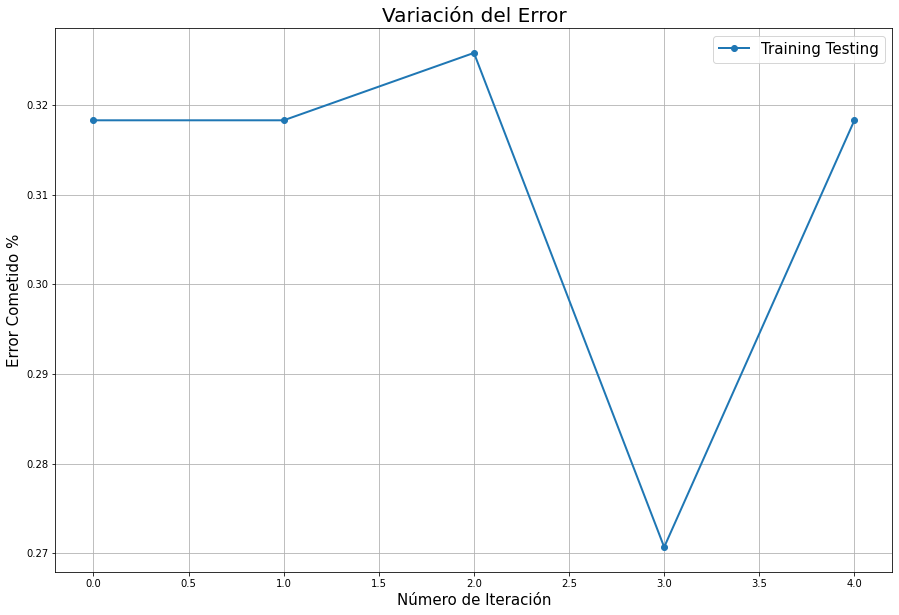

In [12]:
# Obtención del error global
error_tt = []
for mc in mc_tt:
    error_tt.append(1 - (sum(mc.diagonal())/mc.sum()))

plt.figure(figsize = (15, 10))
plt.plot(error_tt, 'o-', lw = 2)
plt.xlabel("Número de Iteración", fontsize = 15)
plt.ylabel("Error Cometido %",    fontsize = 15)
plt.title("Variación del Error",  fontsize = 20)
plt.grid(True)
plt.legend(['Training Testing'], loc = 'upper right', fontsize = 15)

Ahora hacemos lo mismo pero con una validación cruzada con $5$ repeticiones de $10$ grupos cada una.

In [15]:
reps = 5
mc_vcr = []

for i in range(reps):
    
    kfold = KFold(n_splits = 10, shuffle = True)
    folds = kfold.split(X, y)
    mc_rep = 0
    
    for train, test in folds:
        
        knn = KNeighborsClassifier(n_neighbors = 50)
        noimprimir = knn.fit(X.iloc[train], y.iloc[train].values.ravel())
        pred_fold  = knn.predict(X.iloc[test])
        mc_rep = mc_rep + confusion_matrix(y.iloc[test], pred_fold)
        
    mc_vcr.append(mc_rep)

In [16]:
mc_vcr

[array([[272, 231],
        [172, 654]], dtype=int64),
 array([[269, 234],
        [174, 652]], dtype=int64),
 array([[269, 234],
        [171, 655]], dtype=int64),
 array([[271, 232],
        [170, 656]], dtype=int64),
 array([[269, 234],
        [171, 655]], dtype=int64)]

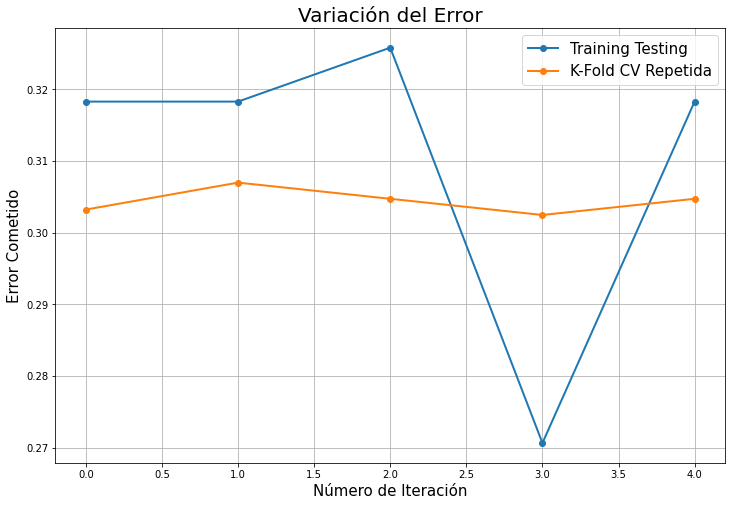

In [17]:
# Obtención del error global
error_vcr = []
for mc in mc_vcr:
    error_vcr.append(1 - (sum(mc.diagonal())/mc.sum()))

plt.figure(figsize=(12, 8))
plt.plot(error_tt, 'o-', lw = 2)
plt.plot(error_vcr, 'o-', lw = 2)
plt.xlabel("Número de Iteración", fontsize = 15)
plt.ylabel("Error Cometido", fontsize = 15)
plt.title("Variación del Error", fontsize = 20)
plt.grid(True)
plt.legend(['Training Testing', 'K-Fold CV Repetida'], loc = 'upper right', fontsize = 15)

Claramente vemos que al usar Validación Cruzada Repetida hemos disminuido la varianza del error en este ejemplo.

<div class='question_container'>
    <h2> Pregunta 2 </h2>
    <p> Utilizando nuevamente la tabla <code>novatosNBA.csv</code> realice lo siguiente:</p>
    <ul>
    <li> El objetivo de este ejercicio es calibrar el método de <code>KNeighborsClassifier</code>. Para esto
genere Validaciones Cruzadas con 10 grupos calibrando el modelo de acuerdo con los tres
        tipos de algoritmos que este permite, es decir, con <code>ball_tree</code>, <code>kd_tree</code> y <code>brute</code>. </li>
    <li> ¿Se puede determinar con claridad cuál algoritmo es el mejor? ¿Cuál algoritmo usaría con base en la información obtenida? </li>
    </ul>
</div>

**Respuesta:** Para este ejercicio utilizaremos un enfoque similar al que se utilizó en clase con SVM's.

In [28]:
reps_p2 = 10

In [29]:
mcs_ball_tree = []
mcs_kd_tree = []
mcs_brute = []

for i in range(reps_p2):
    
    # Hacer 10 folds en esta repetición.
    kfold = KFold(n_splits = 10, shuffle = True)
    
    # Calcular la MC de esta repetición.
    mc_ball_tree = 0
    mc_kd_tree = 0
    mc_brute = 0
    
    for train, test in kfold.split(X, y):
        
        # ball_tree
        modelo = KNeighborsClassifier(n_neighbors = 50, algorithm = 'ball_tree')
        noimprimir = modelo.fit(X.iloc[train], y.iloc[train].values.ravel())
        pred_fold  = modelo.predict(X.iloc[test])
        mc_ball_tree = mc_ball_tree + confusion_matrix(y.iloc[test], pred_fold)
    
        # kd_tree
        modelo = KNeighborsClassifier(n_neighbors = 50, algorithm = 'kd_tree')
        noimprimir = modelo.fit(X.iloc[train], y.iloc[train].values.ravel())
        pred_fold  = modelo.predict(X.iloc[test])
        mc_kd_tree = mc_kd_tree + confusion_matrix(y.iloc[test], pred_fold)

        # brute
        modelo = KNeighborsClassifier(n_neighbors = 50, algorithm = 'brute')
        noimprimir = modelo.fit(X.iloc[train], y.iloc[train].values.ravel())
        pred_fold  = modelo.predict(X.iloc[test])
        mc_brute   = mc_brute + confusion_matrix(y.iloc[test], pred_fold)
    
    mcs_ball_tree.append(mc_ball_tree)
    mcs_kd_tree.append(mc_kd_tree)
    mcs_brute.append(mc_brute)

Comparemos los modelos a lo largo de las iteraciones del CV

In [30]:
len(mcs_ball_tree)

10

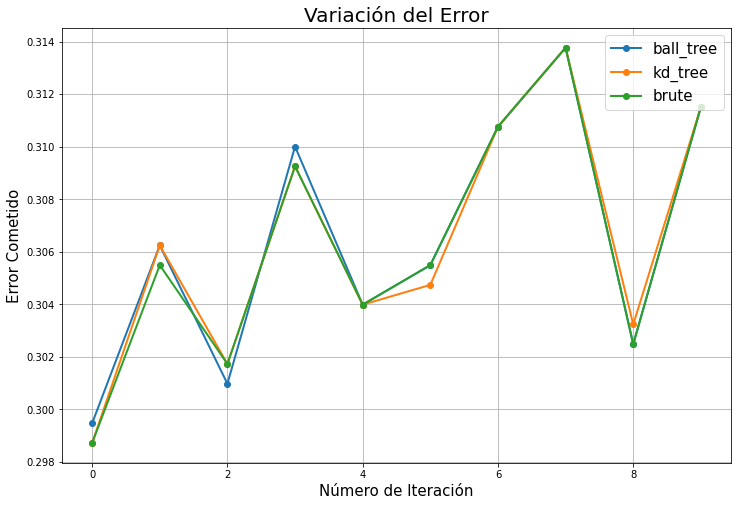

In [31]:
error_ball_tree = []
for mc in mcs_ball_tree:
    error_ball_tree.append(1 - (sum(mc.diagonal())/mc.sum()))

error_kd_tree = []
for mc in mcs_kd_tree:
    error_kd_tree.append(1 - (sum(mc.diagonal())/mc.sum()))

error_brute = []
for mc in mcs_brute:
    error_brute.append(1 - (sum(mc.diagonal())/mc.sum()))
    
plt.figure(figsize=(12, 8))
plt.plot(error_ball_tree, 'o-', lw = 2)
plt.plot(error_kd_tree, 'o-', lw = 2)
plt.plot(error_brute, 'o-', lw = 2)
plt.xlabel("Número de Iteración", fontsize = 15)
plt.ylabel("Error Cometido", fontsize = 15)
plt.title("Variación del Error", fontsize = 20)
plt.grid(True)
plt.legend(['ball_tree', 'kd_tree', 'brute'], loc = 'upper right', fontsize = 15)

Vemos que los modelos se comportan de manera muy similar en cada iteración en la que se aplica CV. Veamos qué es lo que sucede en términos de las clases y sus predicciones.

In [32]:
labels = ['ball_tree', 'kd_tree', 'brute']

mc_ball_tree = np.round(np.sum(mc for mc in mcs_ball_tree) / reps_p2)
mc_kd_tree     = np.round(np.sum(mc for mc in mcs_kd_tree) / reps_p2)
mc_brute    = np.round(np.sum(mc for mc in mcs_brute) / reps_p2)
mcs = [mc_ball_tree, mc_kd_tree, mc_brute]

res = pd.DataFrame()
for i in range(3):
    PG = np.round(np.diag(mcs[i]).sum() / mcs[i].sum() * 100, 2)
    PC = np.round(mcs[i].diagonal()/np.sum(mcs[i],axis = 1) * 100, 2)
    PP = PC[1]
    PN = PC[0]
    res = pd.concat([res, pd.DataFrame([[labels[i], "Global", PG]], columns = ["Kernel", "Precision", "Valor"])])
    res = pd.concat([res, pd.DataFrame([[labels[i], "Si", PP]], columns = ["Kernel", "Precision", "Valor"])])
    res = pd.concat([res, pd.DataFrame([[labels[i], "No", PN]], columns = ["Kernel", "Precision", "Valor"])])

**Comparación de la precisión global**

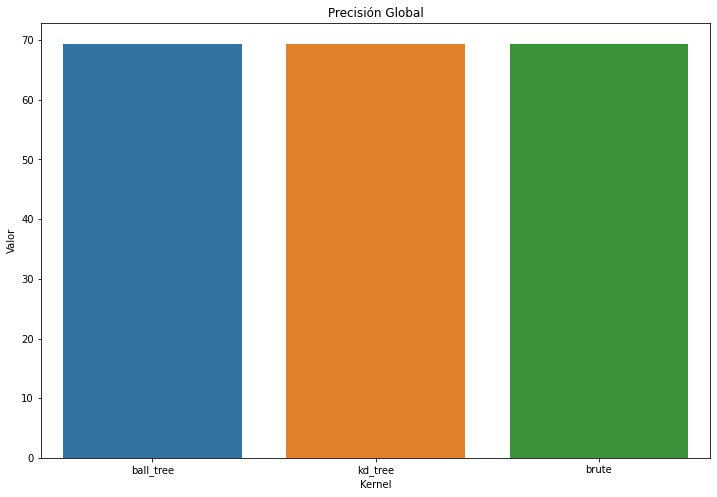

In [35]:
p_global = res.loc[res.Precision == "Global", ]
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(x = 'Kernel', y = 'Valor', data = p_global)
plt.title("Precisión Global")
plt.show()

**Comparación de la precisión por categoría**

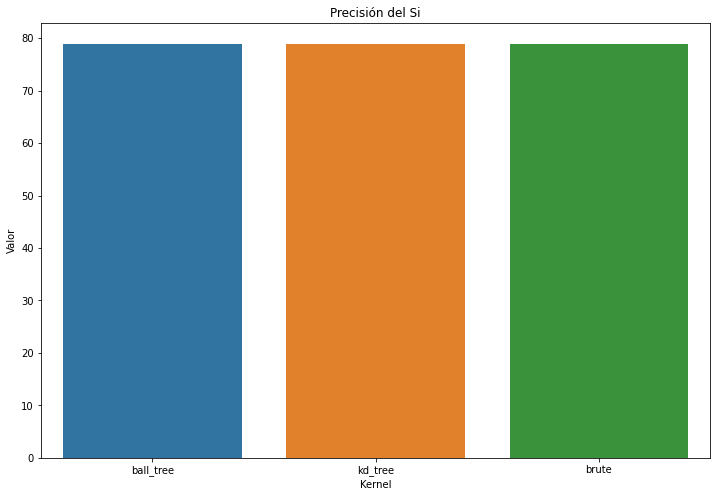

In [37]:
p_si = res.loc[res.Precision == "Si", ]
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(x = 'Kernel', y = 'Valor', data = p_si)
plt.title("Precisión del Si")
plt.show()

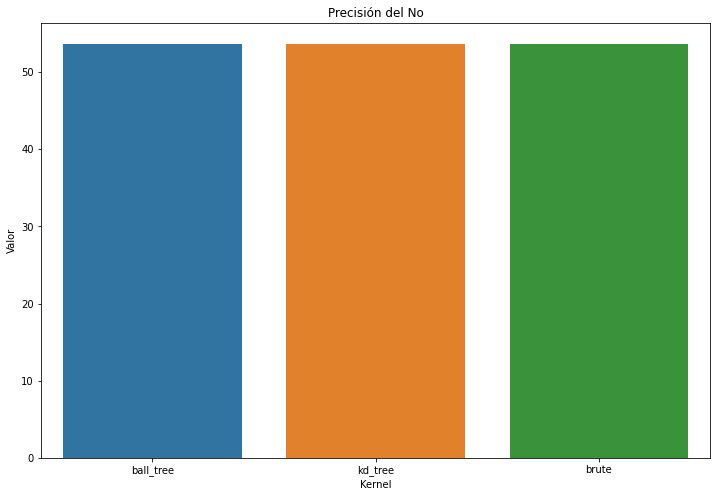

In [38]:
p_si = res.loc[res.Precision == "No", ]
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(x = 'Kernel', y = 'Valor', data = p_si)
plt.title("Precisión del No")
plt.show()

No hay mayor diferencia entre estos tres hiperparámetros (sucede algo parecido a lo que vimos en la Tarea 3 para KNN).

<div class='question_container'>
    <h2> Pregunta 3 </h2>
    <p> Utilizando nuevamente la tabla <code>novatosNBA.csv</code> realice lo siguiente:</p>
    <ul>
    <li> El objetivo de este ejercicio es comparar todos los métodos predictivos vistos en el curso con esta tabla de datos. Para esto genere Validaciones Cruzadas con 10 grupos para los métodos <code> SVM, KNN, árboles, Bosques, ADA Boosting, EXtreme Gradient Boosting, Bayes, LDA,</code> y <code>QDA</code>. Para <code>KNN</code> use los parámetros obtenidos en las calibraciones realizadas en los ejercicios anteriores (en teoría se deberían calibrar todos los métodos). Luego realice un gráfico de barras para comparar los métodos. </li>
    <li> ¿Se puede determinar con claridad cuál modelo es el mejor? ¿Cuál modelo usaría con base
en la información obtenida? </li>
    </ul>
</div>

Ahora vamos a poder comparar los modelos estudiados en el curso con mayor confianza, ya que la variación del error debida a el testing-training split que se hacía en cada tarea se va a ver reducida.😊

Recibimos los modelos a ajustar con hiperparámetros por defecto.
Creamos una lista de diccionarios de Matrices de Confusión. Un diccionario para cada repetición.
Cada diccionario tiene la matriz de confusión de cada modelo.

In [54]:
modelos_ajustar=[]

# KNN
instancia_knn = KNeighborsClassifier()
modelos_ajustar.append({
    'nombre' : 'KNN',
    'instancia' : instancia_knn
})

# Arbol
instancia_arbol = DecisionTreeClassifier()
modelos_ajustar.append({
    'nombre' : 'Árbol de Decisión',
    'instancia' : instancia_arbol
})

# Bosques
instancia_bosques = RandomForestClassifier()
modelos_ajustar.append({
    'nombre' : 'Bosques Aleatorios',
    'instancia' : instancia_bosques
})

# ADA
instancia_tree = DecisionTreeClassifier(criterion="gini")
instancia_ada = AdaBoostClassifier(base_estimator=instancia_tree)
modelos_ajustar.append({
    'nombre' : 'AdaBoost',
    'instancia' : instancia_ada
})

# XGB
instancia_xgb = GradientBoostingClassifier()
modelos_ajustar.append({
    'nombre' : 'XGBoost',
    'instancia' : instancia_xgb
})

# SVM
instancia_svm = SVC(probability=True)
modelos_ajustar.append({
    'nombre' : 'SVM',
    'instancia' : instancia_svm
})

# Bayes
instancia_bayes=GaussianNB()
modelos_ajustar.append({
    'nombre' : 'Bayes',
    'instancia' : instancia_bayes
})

# LDA y QDA
instancia_lda = LinearDiscriminantAnalysis()
modelos_ajustar.append({
    'nombre' : 'LDA',
    'instancia' : instancia_lda
})
instancia_qda = QuadraticDiscriminantAnalysis()
modelos_ajustar.append({
    'nombre' : 'QDA',
    'instancia' : instancia_qda
})
    
# Lista de Diccionarios de Matrices de Confusión
# Un diccionario para cada repetición.
# Cada diccionario tiene la matriz de confusión de cada modelo.

def vprint(msg, imprimir):
    if imprimir:
        print(msg)
        
imprimir = False

start = time.time()
mcs_dicts_list = []
reps_p3 = 2

for i in range(reps_p3):
    
    
    vprint(f"Repeticion {i}", imprimir)
    
    # Hacer 10 folds en esta repetición.
    kfold = KFold(n_splits = 10, shuffle = True)
    
    # Calcular las MCs de esta repetición en un diccionario.
    # Cada una es la suma de la MC de cada Fold.
    mcs_rep = {}
    
    for mod_aj in modelos_ajustar:
        mcs_rep[mod_aj['nombre']] = 0
        
    cont = 0 
    
    for train, test in kfold.split(X, y):
        
        vprint(f" === Procesando Fold {cont} ===", imprimir)
        
        for mod_aj  in modelos_ajustar:
            
            vprint(f" Modelo {mod_aj['nombre']} en este Fold", imprimir)
            
            modelo = mod_aj['instancia']
            noimprimir = modelo.fit(X.iloc[train], y.iloc[train].values.ravel())
            pred_fold  = modelo.predict(X.iloc[test])
            mcs_rep[mod_aj['nombre']] = mcs_rep[mod_aj['nombre']] + \
            confusion_matrix(y.iloc[test], pred_fold)
            
        vprint(f"Fold {cont} listo para todos los modelos", imprimir)
        cont = cont + 1
    
    mcs_dicts_list.append(mcs_rep)
    
    vprint(f" >>> Repetición {i} finalizada <<< ", imprimir)
    
end = time.time()
print(f"Esta busqueda tomó {end - start} segundos.")

Esta busqueda tomó 44.487419843673706 segundos.


In [55]:
mcs_dicts_list

[{'KNN': array([[259, 244],
         [192, 634]], dtype=int64),
  'Árbol de Decisión': array([[242, 261],
         [270, 556]], dtype=int64),
  'Bosques Aleatorios': array([[255, 248],
         [167, 659]], dtype=int64),
  'AdaBoost': array([[255, 248],
         [178, 648]], dtype=int64),
  'XGBoost': array([[255, 248],
         [164, 662]], dtype=int64),
  'SVM': array([[232, 271],
         [123, 703]], dtype=int64),
  'Bayes': array([[406,  97],
         [404, 422]], dtype=int64),
  'LDA': array([[254, 249],
         [148, 678]], dtype=int64),
  'QDA': array([[387, 116],
         [349, 477]], dtype=int64)},
 {'KNN': array([[258, 245],
         [186, 640]], dtype=int64),
  'Árbol de Decisión': array([[242, 261],
         [267, 559]], dtype=int64),
  'Bosques Aleatorios': array([[264, 239],
         [175, 651]], dtype=int64),
  'AdaBoost': array([[252, 251],
         [189, 637]], dtype=int64),
  'XGBoost': array([[254, 249],
         [163, 663]], dtype=int64),
  'SVM': array([[232, 271

Ahora calculamos el promedio de las Matrices de Confusión a lo largo de las repeticiones del CV. En este ejercicio sólo usamos una repetición en realidad.

In [56]:
promedio_mcs = {}
for mod_aj in modelos_ajustar:
    promedio_mcs[mod_aj['nombre']] = 0

for repeticion in mcs_dicts_list:
    for mod_aj in modelos_ajustar:
        promedio_mcs[mod_aj['nombre']] = promedio_mcs[mod_aj['nombre']] + \
        (1/len(mcs_dicts_list))*repeticion[mod_aj['nombre']]

promedio_mcs

{'KNN': array([[258.5, 244.5],
        [189. , 637. ]]),
 'Árbol de Decisión': array([[242. , 261. ],
        [268.5, 557.5]]),
 'Bosques Aleatorios': array([[259.5, 243.5],
        [171. , 655. ]]),
 'AdaBoost': array([[253.5, 249.5],
        [183.5, 642.5]]),
 'XGBoost': array([[254.5, 248.5],
        [163.5, 662.5]]),
 'SVM': array([[232., 271.],
        [126., 700.]]),
 'Bayes': array([[407.5,  95.5],
        [404. , 422. ]]),
 'LDA': array([[257., 246.],
        [144., 682.]]),
 'QDA': array([[386.5, 116.5],
        [348.5, 477.5]])}

Voy a comparar utilizando las precisiones que hemos calculado en todas las tareas anteriores. Luego podremos hacer los gráficos también, para cada modelo.

In [64]:
df_comparacion = pd.DataFrame({})

for mod_name in promedio_mcs:
    
    MC = promedio_mcs[mod_name]
    medidas=MatConf(MC).dict_medidas
    df_este_modelo=pd.DataFrame({})
    for key in list(medidas.keys()):
        df_este_modelo[key]=[medidas[key]]
    df_comparacion = df_comparacion.append(df_este_modelo,ignore_index = True)

df_comparacion.index = list(promedio_mcs.keys())
df_comparacion

Precisión Global  Error Global  Precisión Positiva (PP)  \
KNN                         0.673815      0.326185                 0.771186   
Árbol de Decisión           0.601580      0.398420                 0.674939   
Bosques Aleatorios          0.688111      0.311889                 0.792978   
AdaBoost                    0.674191      0.325809                 0.777845   
XGBoost                     0.689992      0.310008                 0.802058   
SVM                         0.701279      0.298721                 0.847458   
Bayes                       0.624153      0.375847                 0.510896   
LDA                         0.706546      0.293454                 0.825666   
QDA                         0.650113      0.349887                 0.578087   

                    Precisión Negativa (PN)  \
KNN                                0.513917   
Árbol de Decisión                  0.481113   
Bosques Aleatorios                 0.515905   
AdaBoost                           0.503976   
XGBoost                            0.505964   
SVM                                0.461233   
Bayes                              0.810139   
LDA                                0.510934   
QDA                                0.768390   

                    Proporción de Falsos Positivos (PFP)  \
KNN                                             0.486083   
Árbol de Decisión                               0.518887   
Bosques Aleatorios                              0.484095   
AdaBoost                                        0.496024   
XGBoost                                         0.494036   
SVM                                             0.538767   
Bayes                                           0.189861   
LDA                                             0.489066   
QDA                                             0.231610   

                    Proporción de Falsos Negativos (PFN)  \
KNN                                             0.228814   
Árbol de Decisión                               0.325061   
Bosques Aleatorios                              0.207022   
AdaBoost                                        0.222155   
XGBoost                                         0.197942   
SVM                                             0.152542   
Bayes                                           0.489104   
LDA                                             0.174334   
QDA                                             0.421913   

                    Asertividad Positiva (AP)  Asertividad Negativa (AN)  
KNN                                  0.722632                   0.577654  
Árbol de Decisión                    0.681124                   0.474045  
Bosques Aleatorios                   0.728993                   0.602787  
AdaBoost                             0.720291                   0.580092  
XGBoost                              0.727223                   0.608852  
SVM                                  0.720906                   0.648045  
Bayes                                0.815459                   0.502157  
LDA                                  0.734914                   0.640898  
QDA                                  0.803872                   0.525850

Comparemos los modelos gráficamente, de manera global y por clases.

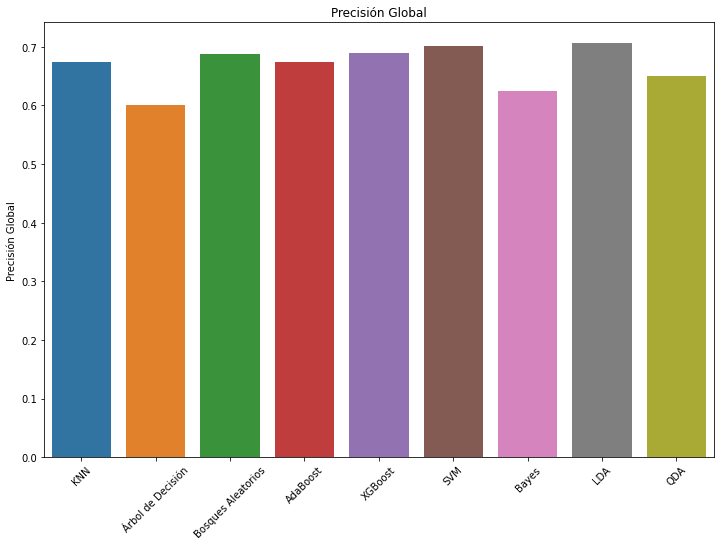

In [76]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(x = df_comparacion.index, y = df_comparacion['Precisión Global'])
plt.title("Precisión Global")
plt.xticks(rotation = 45) 
plt.show()

Vemos que en términos de precisión global, estos modelos son comparables entre sí ¿Qué pasa si estudiamos el comportamiento por clase?

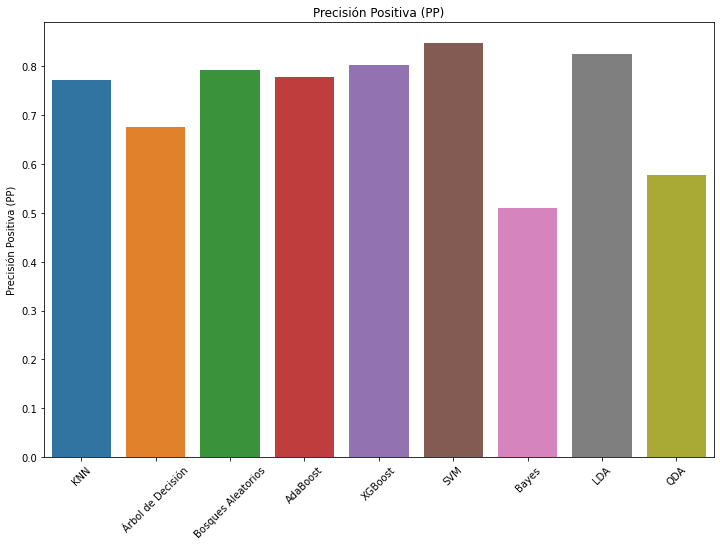

In [77]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(x = df_comparacion.index, y = df_comparacion['Precisión Positiva (PP)'])
plt.title("Precisión Positiva (PP)")
plt.xticks(rotation = 45) 
plt.show()

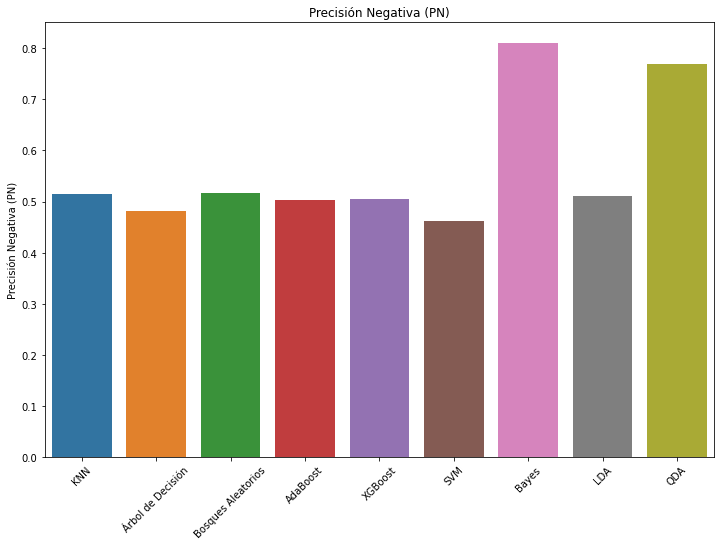

In [78]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(x = df_comparacion.index, y = df_comparacion['Precisión Negativa (PN)'])
plt.title("Precisión Negativa (PN)")
plt.xticks(rotation = 45) 
plt.show()

Vemos que ahora hay una distinción, en la que los modelos de Bayes y QDA tienen una ganancia en la precisión negativa. Esto puede utilizarse en el caso en el que la precisión negativa sea de importancia para el análisis, y se permita sacrificar la precisión positiva hasta cierto punto.

<div class='question_container'>
    <h2> Pregunta 4 </h2>
    <p> Programe una clase denominada <code>validacion_cruzada</code> la cual recibe como atributos una lista de modelos predictivos, la cantidad de validaciones cruzadas a aplicar y la cantidad de grupos a formar. Además de los métodos que debe llevar toda clase, programe en esta clase un método que permita aplicar la validación cruzada utilizando los valores de los atributos (Debe aplicar la validación cruzada para cada uno de los modelos de la lista) y un diccionario con la matriz de confusión de cada uno de los modelos. Debe adjuntar una prueba de uso de la clase con al menos 3 modelos. </p>
</div>

**Respuesta:** La mayor parte del trabajo la hicimos en el ejercicio anterior. Entonces ahora escribimos esto como una clase. Decidí que los modelos a ajustar se recibieran como un diccionario y no como una lista, tal y como lo hice arriba. Así cada modelo recibe su instancia pero recibe su nombre también.

In [70]:
class ValidacionCruzada:
    
    def __init__(self, modelos_ajustar: dict, cv_folds: int, cv_reps: int, imprimir: bool):
        
        self.modelos_ajustar = modelos_ajustar
        self.cv_folds = cv_folds
        self.cv_reps = cv_reps
        self.imprimir = imprimir
        
    def vprint(self,msg):
        if self.imprimir:
            print(msg)
        
    def fit(self, X: pd.DataFrame, y):
        
        # Datos
        self.X = X
        self.y = y
        
        start = time.time()
        
        # Una lista de diccionarios, cada entrada es una repeticion
        # de CV, y tiene un diccionario de Matrices de Confusion
        # obtenidas con CV, 
        # para cada modelo en esa repeticion.
        
        mcs_dicts_list = []

        for i in range(self.cv_reps):

            self.vprint(f"Repeticion {i}")

            # Hacer cv_folds en esta repetición.
            kfold = KFold(n_splits = self.cv_folds, shuffle = True)

            # Calcular las MCs de esta repetición en un diccionario.
            # Cada una es la suma de la MC de cada Fold.
            mcs_rep = {}

            for mod_aj in self.modelos_ajustar:
                mcs_rep[mod_aj['nombre']] = 0

            cont = 0 

            for train, test in kfold.split(self.X, self.y):

                self.vprint(f" === Procesando Fold {cont} ===")

                for mod_aj in self.modelos_ajustar:

                    self.vprint(f" Modelo {mod_aj['nombre']} en este Fold")

                    modelo = mod_aj['instancia']
                    noimprimir = modelo.fit(self.X.iloc[train], self.y.iloc[train].values.ravel())
                    pred_fold  = modelo.predict(self.X.iloc[test])
                    mcs_rep[mod_aj['nombre']] = mcs_rep[mod_aj['nombre']] + \
                    confusion_matrix(self.y.iloc[test], pred_fold)

                self.vprint(f"Fold {cont} listo para todos los modelos")
                cont = cont + 1

            mcs_dicts_list.append(mcs_rep)

            self.vprint(f" >>> Repetición {i} finalizada <<< ")
            
        end = time.time()
        
        self.mcs_dicts_list = mcs_dicts_list
        
        promedio_mcs = {}
        # Calculamos el promedio de las Matrices de Confusión 
        # a lo largo de las repeticiones del CV.
        # Queda un solo diccionario de matrices de Confusion promedio para cada modelo.

        for mod_aj in self.modelos_ajustar:
            promedio_mcs[mod_aj['nombre']] = 0

        for repeticion in self.mcs_dicts_list:
            for mod_aj in self.modelos_ajustar:
                promedio_mcs[mod_aj['nombre']] = promedio_mcs[mod_aj['nombre']] + \
                (1/len(self.mcs_dicts_list))*repeticion[mod_aj['nombre']]
                
        self.promedio_mcs = promedio_mcs
        
        # Hacemos un DataFrame de comparacion entre las matrices de confusion promedio.
        df_comparacion = pd.DataFrame({})

        for mod_name in self.promedio_mcs:

            MC = self.promedio_mcs[mod_name]
            medidas=MatConf(MC).dict_medidas
            df_este_modelo=pd.DataFrame({})
            for key in list(medidas.keys()):
                df_este_modelo[key]=[medidas[key]]
            df_comparacion = df_comparacion.append(df_este_modelo,ignore_index = True)

        df_comparacion.index = list(promedio_mcs.keys())
        
        self.df_comparacion = df_comparacion
        
    def __str__(self):
        return f"""
        
        ===> Clase de Validacion Cruzada <===
        
        - Repeticiones de CV: {self.cv_reps}
        - CV Folds: {self.cv_folds}
        
        - Resultados en cada repeticion para cada modelo:
        
        {self.mcs_dicts_list}
        
        - Matrices de Confusión promedio a lo largo de las repeticiones:
        
        {self.promedio_mcs}
        ==============================
        """

Corramos la clase anterior con tres modelos, todos con sus propios hiperparámetros.
Agregué un print del proceso de las repeticiones y los folds.

In [71]:
nuevos_modelos = [
    {
        'nombre' : 'KNN 50 vecinos',
        'instancia' : KNeighborsClassifier(n_neighbors = 50)
    },
    {
        'nombre' : 'Árbol de Decisión Hiperparam',
        'instancia' : DecisionTreeClassifier(max_depth=5,min_samples_split=10)
    },
    {
        'nombre' : 'XG Boost Hiperparam',
        'instancia' : GradientBoostingClassifier(n_estimators=5, min_samples_split=7)
    }
]

val_cruzada_instancia =  ValidacionCruzada(
    modelos_ajustar = nuevos_modelos, cv_folds = 10, cv_reps = 3, imprimir = True)

val_cruzada_instancia.fit(X, y)

Repeticion 0
 === Procesando Fold 0 ===
 Modelo KNN 50 vecinos en este Fold
 Modelo Árbol de Decisión Hiperparam en este Fold
 Modelo XG Boost Hiperparam en este Fold
Fold 0 listo para todos los modelos
 === Procesando Fold 1 ===
 Modelo KNN 50 vecinos en este Fold
 Modelo Árbol de Decisión Hiperparam en este Fold
 Modelo XG Boost Hiperparam en este Fold
Fold 1 listo para todos los modelos
 === Procesando Fold 2 ===
 Modelo KNN 50 vecinos en este Fold
 Modelo Árbol de Decisión Hiperparam en este Fold
 Modelo XG Boost Hiperparam en este Fold
Fold 2 listo para todos los modelos
 === Procesando Fold 3 ===
 Modelo KNN 50 vecinos en este Fold
 Modelo Árbol de Decisión Hiperparam en este Fold
 Modelo XG Boost Hiperparam en este Fold
Fold 3 listo para todos los modelos
 === Procesando Fold 4 ===
 Modelo KNN 50 vecinos en este Fold
 Modelo Árbol de Decisión Hiperparam en este Fold
 Modelo XG Boost Hiperparam en este Fold
Fold 4 listo para todos los modelos
 === Procesando Fold 5 ===
 Modelo KN

In [72]:
print(val_cruzada_instancia.__str__())


        
        ===> Clase de Validacion Cruzada <===
        
        - Repeticiones de CV: 3
        - CV Folds: 10
        
        - Resultados en cada repeticion para cada modelo:
        
        [{'KNN 50 vecinos': array([[265, 238],
       [174, 652]], dtype=int64), 'Árbol de Decisión Hiperparam': array([[241, 262],
       [188, 638]], dtype=int64), 'XG Boost Hiperparam': array([[ 85, 418],
       [ 47, 779]], dtype=int64)}, {'KNN 50 vecinos': array([[275, 228],
       [168, 658]], dtype=int64), 'Árbol de Decisión Hiperparam': array([[258, 245],
       [177, 649]], dtype=int64), 'XG Boost Hiperparam': array([[ 73, 430],
       [ 50, 776]], dtype=int64)}, {'KNN 50 vecinos': array([[273, 230],
       [171, 655]], dtype=int64), 'Árbol de Decisión Hiperparam': array([[230, 273],
       [143, 683]], dtype=int64), 'XG Boost Hiperparam': array([[ 78, 425],
       [ 44, 782]], dtype=int64)}]
        
        - Matrices de Confusión promedio a lo largo de las repeticiones:
        
  

In [73]:
val_cruzada_instancia.df_comparacion

Precisión Global  Error Global  \
KNN 50 vecinos                        0.696764      0.303236   
Árbol de Decisión Hiperparam          0.676950      0.323050   
XG Boost Hiperparam                   0.645347      0.354653   

                              Precisión Positiva (PP)  \
KNN 50 vecinos                               0.792978   
Árbol de Decisión Hiperparam                 0.794996   
XG Boost Hiperparam                          0.943099   

                              Precisión Negativa (PN)  \
KNN 50 vecinos                               0.538767   
Árbol de Decisión Hiperparam                 0.483101   
XG Boost Hiperparam                          0.156395   

                              Proporción de Falsos Positivos (PFP)  \
KNN 50 vecinos                                            0.461233   
Árbol de Decisión Hiperparam                              0.516899   
XG Boost Hiperparam                                       0.843605   

                              Proporción de Falsos Negativos (PFN)  \
KNN 50 vecinos                                            0.207022   
Árbol de Decisión Hiperparam                              0.205004   
XG Boost Hiperparam                                       0.056901   

                              Asertividad Positiva (AP)  \
KNN 50 vecinos                                 0.738444   
Árbol de Decisión Hiperparam                   0.716364   
XG Boost Hiperparam                            0.647368   

                              Asertividad Negativa (AN)  
KNN 50 vecinos                                 0.613122  
Árbol de Decisión Hiperparam                   0.589329  
XG Boost Hiperparam                            0.625995